In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

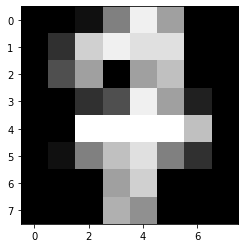

In [4]:
plt.imshow(digits.images[17], cmap='gray')

In [5]:
digits.target[17]

7

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
trainX.shape

(1347, 64)

In [10]:
testX.shape

(450, 64)

In [11]:
dt = DecisionTreeClassifier()

In [12]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
params = {
    'max_features':[50,60],
    'max_depth':[8,10,12]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
gs = GridSearchCV(dt, param_grid=params, cv=5, n_jobs=-1)

In [16]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [50, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [17]:
gs.best_score_

0.8492947290274685

In [18]:
gs.best_params_

{'max_depth': 10, 'max_features': 50}

In [19]:
best_model = gs.best_estimator_

In [20]:
best_model.score(testX,testY)

0.8511111111111112

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [22]:
pipeline = make_pipeline(MinMaxScaler(), SelectKBest(k=50, score_func=f_classif), DecisionTreeClassifier())

In [23]:
grid_params = {
    'selectkbest__k':[20,30,40],
    'decisiontreeclassifier__max_depth':[8,10,12]
}

In [24]:
gs = GridSearchCV(pipeline, grid_params, cv=5, n_jobs=-1)

In [25]:
gs.fit(trainX,trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('selectkbest',
                                        SelectKBest(k=50,
                                                    score_func=<function f_classif at 0x000001FD89250678>)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None...
                                                               min_impurity_decrease=0.0,
  

In [26]:
gs.best_params_

{'decisiontreeclassifier__max_depth': 12, 'selectkbest__k': 40}

In [27]:
gs.best_score_

0.8485523385300668